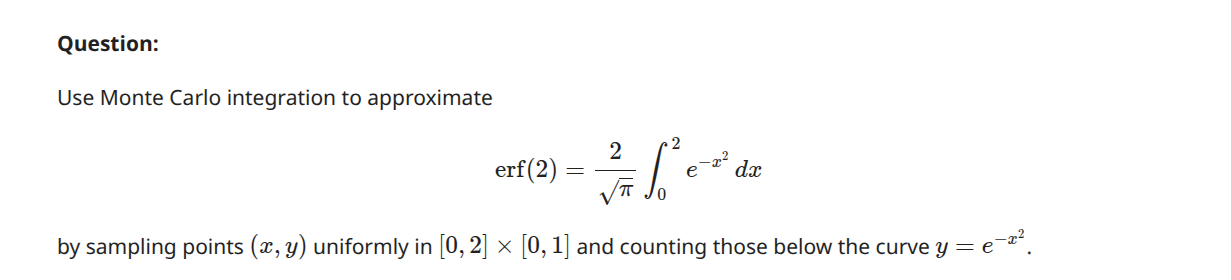

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#========== (c) MC Integration =========
N = 10000
inside = 0
approximation = np.empty(N)
for i in range(N):
    x = np.random.uniform(1,2)
    y = np.random.uniform(0,1)
    if y < np.log(x):
        inside += 1
    approximation[i] = 1. * inside/float(i+1)


In [16]:
import numpy as np
import matplotlib.pyplot as plt


# Parameters
N = 1000    # number of random samples
x_max = 2.0   # evaluate erf(x_max)
y_max = 1.0
# Random uniform samples in rectangle [0, x_max] × [0, 1]
x_arr = np.random.uniform(0, x_max, N)
y_arr = np.random.uniform(0, y_max, N)

under_curve = y_arr <= np.exp(-x_arr**2)
count = np.sum(under_curve)

print (count)
Area_rect = x_max * y_max # rectangle area
Area_under_curve = Area_rect * (count / N)
print (Area_under_curve)

466
0.932


In [4]:
a_arr = np.array([1,2,3,4,5])
print (a_arr)

[1 2 3 4 5]


In [9]:
condition = a_arr < 3.1
print (condition)

[ True  True  True False False]


In [10]:
np.sum(condition)

3

Monte Carlo estimate of erf(2.0): 0.986203


(-0.1, 2.1, -0.04983005350358508, 1.0499919073096946)

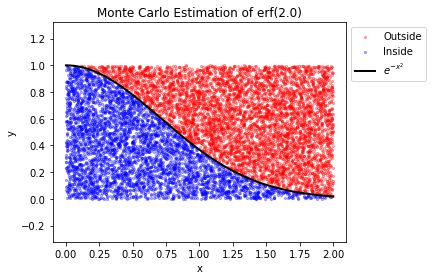

In [18]:
import numpy as np
import matplotlib.pyplot as plt
#import scipy #.special import erf

# Parameters
N = 10000    # number of random samples
x_max = 2.0   # evaluate erf(x_max)
y_max = 1.0
# Random uniform samples in rectangle [0, x_max] × [0, 1]
x_arr = np.random.uniform(0, x_max, N)
y_arr = np.random.uniform(0, y_max, N)

# Check how many points fall under curve y = exp(-x^2)
under_curve = y_arr <= np.exp(-x_arr**2)
count = np.sum(under_curve)

# Monte Carlo area estimate of integral ∫0^x e^{-t^2} dt
Area_rect = x_max * y_max # rectangle area
integral_est = Area_rect * (count / N)

# Error function approximation
erf_MC = (2 / np.sqrt(np.pi)) * integral_est
#===
#erf_exact = scipy.special.erf(2.0)
print(f"Monte Carlo estimate of erf({x_max}): {erf_MC:.6f}")
#print(f"Exact value from scipy: {erf_exact:.6f}")

# Plot sampled points
#plt.figure(figsize=(6, 6))


# Scatter points
plt.scatter(x_arr[~under_curve], y_arr[~under_curve], color='red', s=5, alpha=0.3, label="Outside")
plt.scatter(x_arr[under_curve], y_arr[under_curve], color='blue', s=5, alpha=0.3, label="Inside")

# Plot the curve
x_vals = np.linspace(0, x_max, 300)
plt.plot(x_vals, np.exp(-x_vals**2), 'k', linewidth=2, label=r"$e^{-x^2}$")

# Labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title(rf"Monte Carlo Estimation of erf({x_max})")

# Legend outside plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()
plt.ylim(0,1)
plt.axis("equal")
# plt.show()

In [38]:
import numpy as np
def MC_Integrate(N_total):
    x_array = np.random.uniform(-1,1,N_total) #
    y_array = np.random.uniform(-1,1,N_total)
    N_inside= sum(x_array**2+y_array**2 < 1)
    N_outside = N_total - N_inside
    Ratio = float(N_inside)/N_total
    return [N_total,N_inside,N_outside, Ratio]


f = open("abc.txt","w")
n_trial_list = [100,200,150,330,500,1000,50]
string = "#%8s %8s %8s %8s\n"%("N_tot", "N_in", "N_out", "Ratio") # header line
for n in n_trial_list:
    #print (n)
    [N_total,N_inside,N_outside, Ratio] = MC_Integrate(n)
    print (N_total, N_inside, N_outside, Ratio)
    string = string + "%8d %8d %8d %8.2f\n"%(N_total,N_inside,N_outside,Ratio)


f.write(string)
f.close()


100 81 19 0.81
200 164 36 0.82
150 109 41 0.7266666666666667
330 267 63 0.8090909090909091
500 399 101 0.798
1000 792 208 0.792
50 41 9 0.82


In [43]:

Data = np.loadtxt("abc.txt",skiprows = 0)

#print (Data)
N_tot = Data[:,0]
N_inside = Data[:,1]
N_outside = Data[:,2]
Ratio = Data[:,3]

print (N_tot)


[ 100.  200.  150.  330.  500. 1000.   50.]
